In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras

In [3]:
data = pd.read_csv('master_dataset.csv')

In [4]:
data.head()

,School_code,AgeID,School_name,Street,Town_suburb,Postcode,Phone,School_Email,Website,Fax,...,Operational_directorate_office_address,FACS_district,Local_health_district,AECG_region,ASGS_remoteness,Latitude,Longitude,Assets unit,SA4,Date_extracted
0,1138,49127.0,Barnsley Public School,Cliffbrook St,Barnsley,2278.0,4953 2976,barnsley-p.school@det.nsw.edu.au,https://barnsley-p.schools.nsw.gov.au,4953 3094,...,"40-44 Coral Cr, Gateshead West 2290",Hunter New England & Central Coast,Hunter New England,Hunter,Major Cities of Australia,-32.933094,151.594552,Hunter/Central Coast,Newcastle and Lake Macquarie,2023-10-05
1,1139,50460.0,Barooga Public School,Hughes St,Barooga,3644.0,03 5873 4242,barooga-p.school@det.nsw.edu.au,https://barooga-p.schools.nsw.gov.au,03 5873 4700,...,"521 Macauley St, Albury 2640","Murrumbidgee, Far West & Western NSW",Murrumbidgee,Riverina 2,Inner Regional Australia,-35.912963,145.695985,Southern NSW,Murray,2023-10-05
2,1140,49371.0,Barraba Central School,29 Gotha Street,BARRABA,2347.0,6782 1104,barraba-c.school@det.nsw.edu.au,https://barraba-c.schools.nsw.gov.au,6782 1231,...,"66-68 Frome St, Moree 2400",Hunter New England & Central Coast,Hunter New England,North Western 2,Outer Regional Australia,-30.382390,150.599478,North Western NSW,New England and North West,2023-10-05
3,1143,49523.0,Barrington Public School,1 Kenmore St,Barrington,2422.0,6558 4258,barrington-p.school@det.nsw.edu.au,https://barrington-p.schools.nsw.gov.au,6558 4216,...,"Middle St, Forster 2428",Hunter New England & Central Coast,Hunter New England,Manning,Outer Regional Australia,-31.971159,151.911058,North Coast,Mid North Coast,2023-10-05
4,1146,49683.0,Baryulgil Public School,7135 Clarence Way,Baryulgil,2460.0,6647 2124,baryulgil-p.school@det.nsw.edu.au,https://baryulgil-p.schools.nsw.gov.au,6647 2151,...,"97 Mary St, Grafton 2460",Mid North Coast & Northern NSW,Northern NSW,Upper North Coast,Outer Regional Australia,-29.223500,152.605615,North Coast,Coffs Harbour - Grafton,2023-10-05


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 44 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   School_code                             2216 non-null   int64  
 1   AgeID                                   2214 non-null   float64
 2   School_name                             2216 non-null   object 
 3   Street                                  2216 non-null   object 
 4   Town_suburb                             2209 non-null   object 
 5   Postcode                                2215 non-null   float64
 6   Phone                                   2216 non-null   object 
 7   School_Email                            2215 non-null   object 
 8   Website                                 2216 non-null   object 
 9   Fax                                     2113 non-null   object 
 10  latest_year_enrolment_FTE               2166 non-null   floa

In [6]:
data.describe()

,School_code,AgeID,Postcode,latest_year_enrolment_FTE,ICSEA_value,Support_classes,Latitude,Longitude
count,2216.000000,2214.000000,2215.000000,2166.000000,2157.000000,0.0,2216.000000,2216.000000
mean,4290.359206,50556.756549,2416.827088,365.111588,979.490032,NaN,-33.185428,150.620679
std,2349.901554,7825.343475,247.514983,323.158491,95.388613,NaN,1.733418,1.837396
min,1001.000000,6354.000000,2000.000000,2.000000,586.000000,NaN,-37.084209,141.439970
25%,2409.750000,48156.250000,2204.000000,101.250000,922.000000,NaN,-33.979356,150.589743
50%,3956.500000,49675.500000,2420.000000,293.000000,974.000000,NaN,-33.766117,150.992114
75%,5558.250000,50810.250000,2590.000000,532.000000,1043.000000,NaN,-32.810491,151.312040
max,8924.000000,88561.000000,4383.000000,2079.000000,1225.000000,NaN,-28.169510,159.069032


In [7]:
data = data.drop('Support_classes', axis=1) # it has no value in this column

In [8]:
data = data[~data.isin(["np"]).any(axis=1)] # remove all rows that contain np

In [9]:
new_data = data.dropna() # drop all rows with na

In [10]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1385 entries, 0 to 2206
Data columns (total 43 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   School_code                             1385 non-null   int64  
 1   AgeID                                   1385 non-null   float64
 2   School_name                             1385 non-null   object 
 3   Street                                  1385 non-null   object 
 4   Town_suburb                             1385 non-null   object 
 5   Postcode                                1385 non-null   float64
 6   Phone                                   1385 non-null   object 
 7   School_Email                            1385 non-null   object 
 8   Website                                 1385 non-null   object 
 9   Fax                                     1385 non-null   object 
 10  latest_year_enrolment_FTE               1385 non-null   floa

In [11]:
new_data.head()

,School_code,AgeID,School_name,Street,Town_suburb,Postcode,Phone,School_Email,Website,Fax,...,Operational_directorate_office_address,FACS_district,Local_health_district,AECG_region,ASGS_remoteness,Latitude,Longitude,Assets unit,SA4,Date_extracted
0,1138,49127.0,Barnsley Public School,Cliffbrook St,Barnsley,2278.0,4953 2976,barnsley-p.school@det.nsw.edu.au,https://barnsley-p.schools.nsw.gov.au,4953 3094,...,"40-44 Coral Cr, Gateshead West 2290",Hunter New England & Central Coast,Hunter New England,Hunter,Major Cities of Australia,-32.933094,151.594552,Hunter/Central Coast,Newcastle and Lake Macquarie,2023-10-05
3,1143,49523.0,Barrington Public School,1 Kenmore St,Barrington,2422.0,6558 4258,barrington-p.school@det.nsw.edu.au,https://barrington-p.schools.nsw.gov.au,6558 4216,...,"Middle St, Forster 2428",Hunter New England & Central Coast,Hunter New England,Manning,Outer Regional Australia,-31.971159,151.911058,North Coast,Mid North Coast,2023-10-05
6,1149,50056.0,Batemans Bay Public School,Mundarra Way,Surfside,2536.0,4472 4059,batemansba-p.school@det.nsw.edu.au,https://batemansba-p.schools.nsw.gov.au,4472 8457,...,"15A Citi Centre, Orient St, Batemans Bay",Illawarra Shoalhaven & Southern NSW,Southern NSW,Lower South Coast,Inner Regional Australia,-35.700051,150.188373,Southern NSW,Capital Region,2023-10-05
7,1150,50975.0,Bathurst Public School,George St,Bathurst,2795.0,6331 3923,bathurst-p.school@det.nsw.edu.au,https://bathurst-p.schools.nsw.gov.au,6332 2305,...,"Cnr George and Rocket St, Bathurst 2795","Murrumbidgee, Far West & Western NSW",Western NSW,Western 1,Inner Regional Australia,-33.420942,149.570615,North Western NSW,Central West,2023-10-05
12,1167,50539.0,Beelbangera Public School,Rankins Springs Rd,Beelbangera,2680.0,6963 5368,beelbanger-p.school@det.nsw.edu.au,https://beelbanger-p.schools.nsw.gov.au,6963 5506,...,"Government Offices, 104-110 Banna Ave, Griffit...","Murrumbidgee, Far West & Western NSW",Murrumbidgee,Riverina 1,Outer Regional Australia,-34.252836,146.101067,Southern NSW,Riverina,2023-10-05


##### Create new data frame for preprocessing

In [12]:
data_for_preprocessing = new_data[['latest_year_enrolment_FTE', 'Indigenous_pct', 'LBOTE_pct', 'ICSEA_value', 'Level_of_schooling', 'Selective_school', 'School_specialty_type', 'School_subtype', 'Preschool_ind', 'Distance_education', 'Intensive_english_centre', 'School_gender', 'Late_opening_school', 'ASGS_remoteness', 'Latitude', 'Longitude', 'Opportunity_class']].copy()

##### Reset index

In [13]:
data_for_preprocessing.reset_index(drop=True, inplace=True)
data_for_preprocessing.head()

,latest_year_enrolment_FTE,Indigenous_pct,LBOTE_pct,ICSEA_value,Level_of_schooling,Selective_school,School_specialty_type,School_subtype,Preschool_ind,Distance_education,Intensive_english_centre,School_gender,Late_opening_school,ASGS_remoteness,Latitude,Longitude,Opportunity_class
0,295.0,13.0,3.0,948.0,Primary School,Not Selective,Comprehensive,Kinder to Year 6,N,N,N,Coed,N,Major Cities of Australia,-32.933094,151.594552,N
1,48.0,17.0,0.0,978.0,Primary School,Not Selective,Comprehensive,Kinder to Year 6,N,N,N,Coed,N,Outer Regional Australia,-31.971159,151.911058,N
2,524.0,28.0,6.0,905.0,Primary School,Not Selective,Comprehensive,Kinder to Year 6,Y,N,N,Coed,N,Inner Regional Australia,-35.700051,150.188373,N
3,477.0,12.0,14.0,999.0,Primary School,Not Selective,Comprehensive,Kinder to Year 6,N,N,N,Coed,N,Inner Regional Australia,-33.420942,149.570615,N
4,162.0,4.0,29.0,1001.0,Primary School,Not Selective,Comprehensive,Kinder to Year 6,N,N,N,Coed,N,Outer Regional Australia,-34.252836,146.101067,N


In [14]:
data_for_preprocessing.shape

(1385, 17)

##### Create data frame for dummies

In [15]:
data_drop_for_dummies = data_for_preprocessing.drop(['Level_of_schooling', 'Selective_school', 'School_specialty_type', 'School_subtype', 'Preschool_ind', 'Distance_education', 'Intensive_english_centre', 'School_gender', 'Late_opening_school', 'ASGS_remoteness', 'Opportunity_class'], axis=1)

In [16]:
data_drop_for_dummies

,latest_year_enrolment_FTE,Indigenous_pct,LBOTE_pct,ICSEA_value,Latitude,Longitude
0,295.0,13.0,3.0,948.0,-32.933094,151.594552
1,48.0,17.0,0.0,978.0,-31.971159,151.911058
2,524.0,28.0,6.0,905.0,-35.700051,150.188373
3,477.0,12.0,14.0,999.0,-33.420942,149.570615
4,162.0,4.0,29.0,1001.0,-34.252836,146.101067
...,...,...,...,...,...,...
1380,638.2,14.0,10.0,928.0,-34.559745,150.834080
1381,568.0,11.0,38.0,952.0,-33.678883,150.875744
1382,1088.4,6.0,56.0,954.0,-33.770841,150.838148
1383,927.5,15.0,5.0,951.0,-33.008794,151.582022


In [18]:
categorical_columns = ['Level_of_schooling', 'Selective_school', 'School_specialty_type', 'School_subtype', 'Preschool_ind', 'Distance_education', 'Intensive_english_centre', 'School_gender', 'Late_opening_school', 'ASGS_remoteness']
dummies = pd.get_dummies(data_for_preprocessing, columns=categorical_columns)

In [19]:
dummies = dummies.drop(['latest_year_enrolment_FTE', 'Indigenous_pct', 'LBOTE_pct', 'ICSEA_value', 'Latitude', 'Longitude', 'Opportunity_class'], axis=1)

In [20]:
X = pd.concat([data_drop_for_dummies, dummies], axis=1)
y = data_for_preprocessing['Opportunity_class']

In [21]:
y = y.replace({'Y': 1, 'N': 0})

In [22]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1380    0
1381    0
1382    0
1383    0
1384    0
Name: Opportunity_class, Length: 1385, dtype: int64

In [23]:
X['Indigenous_pct'] = X['Indigenous_pct'].astype(float)
X['LBOTE_pct'] = X['LBOTE_pct'].astype(float)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 55 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   latest_year_enrolment_FTE                         1385 non-null   float64
 1   Indigenous_pct                                    1385 non-null   float64
 2   LBOTE_pct                                         1385 non-null   float64
 3   ICSEA_value                                       1385 non-null   float64
 4   Latitude                                          1385 non-null   float64
 5   Longitude                                         1385 non-null   float64
 6   Level_of_schooling_Central/Community School       1385 non-null   uint8  
 7   Level_of_schooling_Infants School                 1385 non-null   uint8  
 8   Level_of_schooling_Primary School                 1385 non-null   uint8  
 9   Level_of_schooling_

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
35/35 [==============================] - 1s 2ms/step - loss: 0.5347 - accuracy: 0.7392
Epoch 2/10
35/35 [==============================] - 0s 2ms/step - loss: 0.2088 - accuracy: 0.9612
Epoch 3/10
35/35 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9612
Epoch 4/10
35/35 [==============================] - 0s 2ms/step - loss: 0.1498 - accuracy: 0.9612
Epoch 5/10
35/35 [==============================] - 0s 2ms/step - loss: 0.1427 - accuracy: 0.9612
Epoch 6/10
35/35 [==============================] - 0s 2ms/step - loss: 0.1383 - accuracy: 0.9612
Epoch 7/10
35/35 [==============================] - 0s 2ms/step - loss: 0.1337 - accuracy: 0.9612
Epoch 8/10
35/35 [==============================] - 0s 2ms/step - loss: 0.1317 - accuracy: 0.9612
Epoch 9/10
35/35 [==============================] - 0s 2ms/step - loss: 0.1297 - accuracy: 0.9612
Epoch 10/10
35/35 [==============================] - 0s 2ms/step - loss: 0.1282 - accuracy: 0.9612


In [31]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

9/9 [==============================] - 0s 2ms/step - loss: 0.1836 - accuracy: 0.9422
Test Loss: 0.183562234044075
Test Accuracy: 0.9422382712364197


##### Different method

In [32]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.5),  # Dropout for regularization
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),  # Dropout for regularization
    keras.layers.Dense(1, activation='sigmoid')
])

In [33]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [35]:
history = model.fit(
    X_train, y_train,
    epochs=100,  # Adjust the number of epochs as needed
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/100
35/35 [==============================] - 1s 8ms/step - loss: 0.3011 - accuracy: 0.9061 - val_loss: 0.2587 - val_accuracy: 0.9422
Epoch 2/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1747 - accuracy: 0.9612 - val_loss: 0.2563 - val_accuracy: 0.9422
Epoch 3/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1573 - accuracy: 0.9612 - val_loss: 0.2445 - val_accuracy: 0.9422
Epoch 4/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1448 - accuracy: 0.9612 - val_loss: 0.2431 - val_accuracy: 0.9422
Epoch 5/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1559 - accuracy: 0.9612 - val_loss: 0.2348 - val_accuracy: 0.9422
Epoch 6/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1434 - accuracy: 0.9612 - val_loss: 0.2322 - val_accuracy: 0.9422
Epoch 7/100
35/35 [==============================] - 0s 5ms/step - loss: 0.1414 - accuracy: 0.9612 - val_loss: 0.2290 - val_accuracy: 0.9422
Epoch 8/100
3

In [36]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

9/9 [==============================] - 0s 3ms/step - loss: 0.2272 - accuracy: 0.9422
Test Loss: 0.22724942862987518
Test Accuracy: 0.9422382712364197


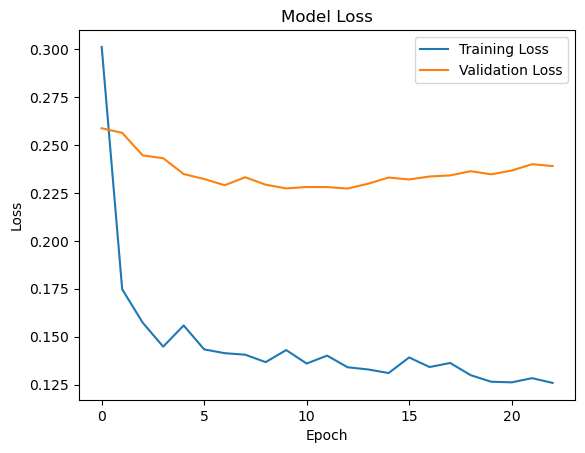

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()